# Introduction

In Content-based Recommendation Systems, we have been familiar with a simple Product Recommendation System based on the features of each item. The characteristic of Content-based Recommendation Systems is that the model construction for each user does not depend on other users but depends on the profile of each item. This has the advantage of saving memory and computing time. At the same time, the system is able to take advantage of the characteristic information of each item as described in the description of each item. This description can be built by the supplier or collected by asking users to tag items. Building a feature vector for each item often includes Natural Language Processing (NLP) techniques.

The above approach has two basic disadvantages:
- When building a model for a single user, content-based systems do not take advantage of information from other users. This information is often useful because users’ purchasing behavior is often grouped into a few simple groups; if the purchasing behavior of a few users in a group is known, the system should be able to infer the behavior of the remaining users.
- We don’t always have a description for every item. Asking users to tag is even more difficult because not everyone is willing to do it; or if they do, it’s a personal preference. NLP algorithms are also more complicated because they have to deal with synonyms, abbreviations, misspellings, or words written in different languages.

The above disadvantages can be solved by Collaborative Filtering (CF). In this article, I will present to you a CF method called Neighborhood-based Collaborative Filtering (NBCF). The next article will present another CF method called Matrix Factorization Collaborative Filtering. When we just say Collaborative Filtering, we will implicitly understand that the method used is Neighborhood-based.

The basic idea of ​​NBCF is to determine the interest level of a user in an item based on other users who are similar to this user. The similarity between users can be determined through the interest level of these users in other items that the system already knows. For example, A and B both like the movie Criminal Police, meaning they both rate this movie 5 stars. We know that A also likes The Judge, so it is likely that B also likes this movie.

As you can imagine, the two most important questions in a Neighborhood-based Collaborative Filtering system are:
- How to determine the similarity between two users?
- Once similar users are identified, how to predict a user's interest in an item?

# User-user Collaborative Filtering

### Similarity function

The most important task to do first in User-user Collaborative Filtering is to determine the similarity between two users. The only data we have is the Utility matrix $Y$. So this similarity must be determined based on the columns corresponding to the two users in this matrix.

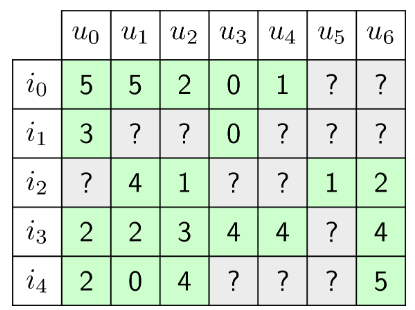

Suppose user from $u_0$ to $u_6$ and all the item from $i_0$ to $i_4$ where the number in the matrix is the rating of the user for the item.

In the first observation, we can realize that $u_0$ and $u_1$ like $i_0$, $i_1$, #i_2$ and ignore $i_3$, $i_4$. And in constrast to other user. Then a similarity function must ensure:

$$sim(u_0, u_1) > sim(u_0, u_i), \forall i > 1$$


Luckily that $u_1$ like $i_2$ so the system need to recommend $i_2$ to $u_0$.

The question is: Which similarity function should we use? To measure the similarity between two users, typically we build a feature vector for each user then apply a function haave ability to measure the similarity between them. Attention thatt this feature vector is different than item profiles in Recommendation Systems. Each vectors directly created based on Ultilities matrix. With each user, the only information we know is the rating of that user for each item.

But the problem is this feature vector is very sparse. In the real world, the number of items is often much larger than the number of items that a user has rated. This makes the similarity function very difficult to determine. And we only want to calculate the similarity not inference the final value of rating.

So what value should each ‘?’ be replaced with to limit the bias? One option you might consider is to replace the ‘?’ with a value of ‘0’. This is not very good because the value ‘0’ corresponds to the lowest level of interest. A safer value is 2.5 because it is the average of 0, the lowest level, and 5, the highest level. However, this value has its limitations for easy-going or difficult users. For easy-going users, liking corresponds to 5 stars, and disliking can be slightly less, say 3 stars. Choosing a value of 2.5 would make the remaining items too negative for that user. The opposite happens for more difficult users who only give 3 stars to items they like and less stars to items they dislike.

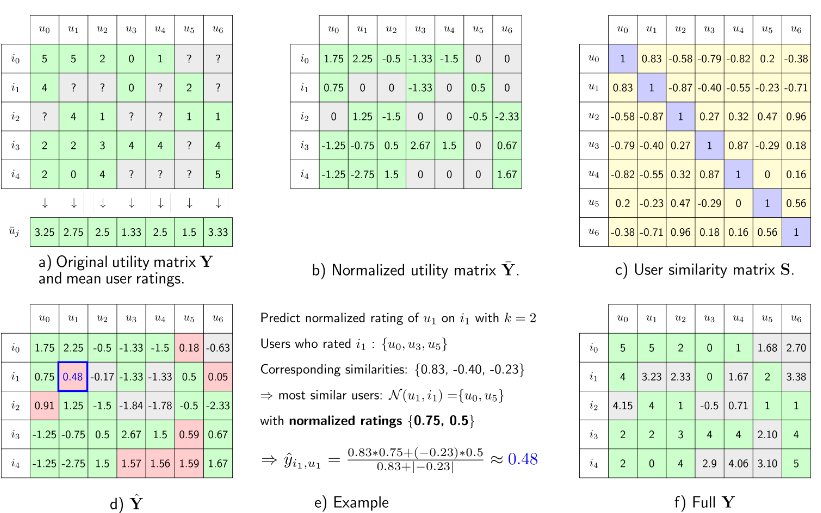

**Normalized Utility matrix**

The last row in Figure $a)$ is the average of ratings for each user. High values ​​correspond to easy-going users and vice versa. Then, if we continue to subtract this value from each rating and replace the unknown values ​​with 0, we will get the normalized utility matrix as in Figure $b)$. You may wonder why this normalization step is important, the answer is right here:
- Subtracting the average of each column causes each column to have positive and negative values. Positive values ​​correspond to users liking the item, negative values ​​correspond to users disliking the item. Values ​​equal to 0 correspond to whether the user likes the item or not.
- Technically, the dimensionality of the utility matrix is ​​very large with millions of users and items, if we store all these values ​​in a matrix, there is a high possibility that there will not be enough memory. Observe that since the number of ratings is usually very small compared to the size of the utility matrix, it is better to store this matrix as a sparse matrix, i.e. only storing non-zero values ​​and their positions. Therefore, it is better to replace the ‘?’ with the value ‘0’, meaning it is not yet known whether the user likes the item or not. This not only optimizes memory but also makes the later calculation of the similarity matrix more efficient.

After normalizing the data as above, some commonly used similarity functions are:

**Cosine similarity**

Recall the formula for the cosine between two user $u_1$ and $u_2$:

$$\text{cosin}(u_1, u_2) = \frac{u_1^Tu_2}{\|u_1\|_2 \dot \|u_2\|_2}$$

where $u_1$ and $u_2$ are the feature vectors of user $u_1$ and $u_2$ already normalize

The similarity got limited in range $[-1, 1]$. The value 1 means two users are similar and -1 means they are opposite.

From thí similarity matrix, we can classify users into 2 group $(u_0, u_1)$ and $(u_2, u_3, u_4, u_5, u_6)$. Because this Matrix very small, which we can easily observe it when the number of users and items is very large.

There's a important note that when the number of users and items is very large, the similarity matrix is also very large. And most likely, there is not enough memory to store even just over half of the elements of this symmetric matrix. In such cases, for each user, we only need to calculate and store the result of one row of the similarity matrix, corresponding to the similarity between that user and the remaining users.

**Pearson correlation**

The Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. Same like Cosine similarity

With Pearson correlation, we can calculate the similarity between two users $u_1$ and $u_2$ as follows:

$$r = \frac{\sum_{i=1}^n (r_{1i} - \bar{r_1})(r_{2i} - \bar{r_2})}{\sqrt{\sum_{i=1}^n (r_{1i} - \bar{r_1})^2} \sqrt{\sum_{i=1}^n (r_{2i} - \bar{r_2})^2}}$$

where $r_{1i}$ and $r_{2i}$ are the ratings of user $u_1$ and $u_2$ for item $i$, and $\bar{r_1}$ and $\bar{r_2}$ are the average ratings of user $u_1$ and $u_2$ respectively.

### Rating prediction

Determining a user's level of interest in an item based on the nearest users (neighbor users) is very similar to what we see in **K-nearest neighbors**. When working in large-scale problems, we will see that KNN method can be used widely in many fields.

But ofcourse we can't uses only KNN 
but also need to do many more intermediate steps.

By using KNN, missing rating can be predicted based on the *k* neighbors. The predicted rating is the weighted average of the ratings of the *k* neighbors. Of course, we are only interested in users who have rated the item under consideration. Predicted rating is often defined as a weighted average of normalized ratings. There is one point to note, in KNN, the weights are determined based on the distance between two points, and these distances are non-negative numbers. Meanwhile, in CF, the weights are determined based on the similarity between two users, these weights can be less than 0 as shown in Figure $c)$.

$$\hat{y}_{u,i} = \frac{\sum_{u_j \in N(u, i)} sim(u, u_j) \cdot \bar{y}_{i, u_j}}{\sum_{u_j \in N(u, i)} |sim(u, u_j)|} $$

Where:
- $\mathcal{N}(u, i)$ is the set of users who have rated item $i$.

In Figure $d)$ represents filling in missing values ​​in the normalized utility matrix. The red background cells represent positive values, which are items that users may be interested in. Here, I have taken the threshold to be 0, we can absolutely choose other thresholds than 0.

Example: In Figure $e)$ given, with the number of $k = 2$, we try to measure rating of $u_1$ for $i_1$, then:
- Identify the users already rated $i_1$, are $u_0, u_3, u_5$.
- Calculate the similarity between $u_0$ each of them is $0.83, -0.4, -0.23$ correspondingly. With two ($k$) nearest neighbors are $u_0$ and $u_5$.
- Identify normalized rating of $u_0, u_5$ for $i_1$ are $.75, .5$.
- Predicted:

$$\bar{y}_{u_1, i_1} = \frac{0.83 \cdot 0.75 + (-0.23) \cdot 0.5}{0.83 + |- 0.23|} \approx 0.48$$

Converting standardized ratings values ​​to a scale of 5 can be done by adding the columns of the matrix $\bar{Y}$ with the average rating of each user.

How the system decides which items to recommend to each user can be determined in many different ways. You can sort unrated items in order of largest to smallest predicted ratings, or only select items with positive normalized predicted ratings - corresponding to what this user is more likely to like.

Before entering the programming part for User-user CF, let's look at Item-item CF.

# Item-item Collaborative Filtering

Why don't we jump into User-user CF? There are two main reason for this:
- In fact, the number of users is always much larger than the number of items. As a result, the Similarity matrix is ​​very large with the number of elements that must be stored being more than half of the square of the number of users (note that this matrix is ​​symmetrical). This, as mentioned above, makes storing this matrix in many cases impractical.
- Ultility matrix usually very sparse. With a very large number of users compared to the number of items, many columns of this matrix will be very sparse, meaning there are only a few non-zero elements. The reason is that users are often lazy to rate. Because of this, once that user changes their rating or rates additional items, the average of the ratings as well as the normalized vector corresponding to this user changes a lot. Accordingly, the calculation of the Similarity matrix, which takes a lot of memory and time, also needs to be done again.

On the contrary, if we calculate the similarity between items and then recommend items that are similar to a user's favorite items, there will be the following benefits:
- Because the number of items is usually smaller than the number of users, the Similarity matrix in this case is also much smaller, convenient for storage and calculation in the following steps.
- Because the number of known elements in the Utility matrix is ​​the same but the number of rows (items) is less than the number of columns (users), on average, each row of this matrix will have more known elements than the number of known elements in each column. This is understandable because each item can be rated by many users. Accordingly, the average value of each row changes less when a few more ratings are added. Thus, updating the Similarity Matrix can be done less frequently.

The second approach called Item-item Collaborative Filtering and more popular in practice

Process for predicting missing ratings same like User-user CF:

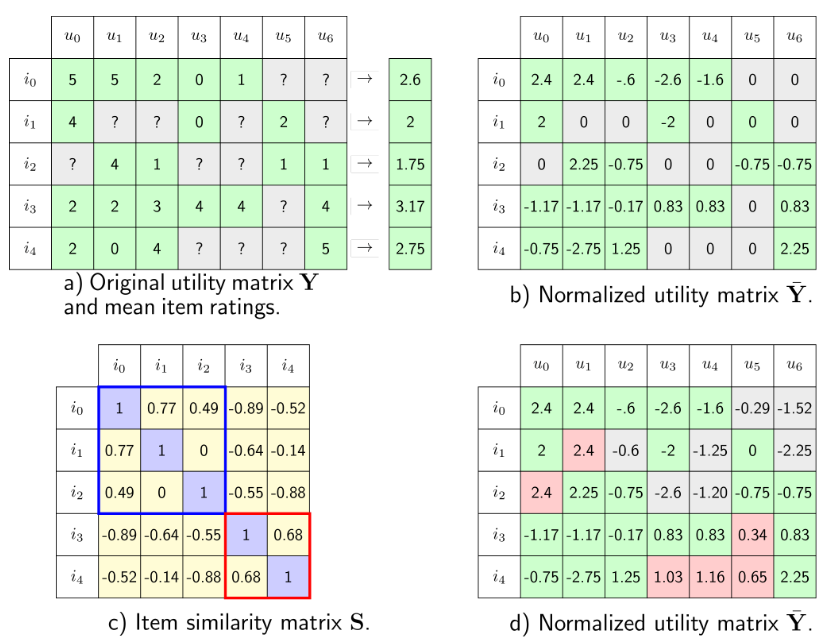

There is an interesting point in the Similarity matrix in Figure $c)$ is that the elements in the two blue and red squares are all non-negative numbers, the elements outside are negative numbers. This shows that the items can be divided into two distinct groups with items with non-negative similarity falling into one group. So, unintentionally, we have done item clustering. This will help a lot in predicting later.

The results of which items to recommend to each user are shown by the red boxes in Figure $d)$. This result is slightly different from the results found by User-user CF in the last two columns corresponding to $u_5, u_6$. This result seems more reasonable because from the Utility Matrix, there are two groups of users who like two different groups of items.

**Computationally, Item-item CF can be obtained from User-user CF by transposing the utility matrix, and considering items as rating users. After calculating the final result, we transpose it again to obtain the result.**